**instalattion et importation des bibliothèque necessaires**

In [ ]:
pip install pandas seaborn matplotlib sklearn

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**a - Chargement et nettoyage des données**

In [2]:
# charger le dataset
data = pd.read_csv('climate_change_dataset.csv')

# afficher le debut du tableau ainsi que les infos 
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        48 non-null     object 
 1   Month                       48 non-null     object 
 2   Avg_Temp (°C)               46 non-null     float64
 3   Max_Temp (°C)               46 non-null     object 
 4   Min_Temp (°C)               45 non-null     object 
 5   Precipitation (mm)          49 non-null     object 
 6   Humidity (%)                45 non-null     object 
 7   Wind_Speed (m/s)            51 non-null     object 
 8   Solar_Irradiance (W/m²)     48 non-null     object 
 9   Cloud_Cover (%)             49 non-null     object 
 10  CO2_Concentration (ppm)     47 non-null     float64
 11  Latitude                    47 non-null     object 
 12  Longitude                   50 non-null     object 
 13  Altitude (m)                49 non-nu

,Year,Month,Avg_Temp (°C),Max_Temp (°C),Min_Temp (°C),Precipitation (mm),Humidity (%),Wind_Speed (m/s),Solar_Irradiance (W/m²),Cloud_Cover (%),CO2_Concentration (ppm),Latitude,Longitude,Altitude (m),Proximity_to_Water (km),Urbanization_Index,Vegetation_Index,ENSO_Index,Particulate_Matter (µg/m³),Sea_Surface_Temp (°C)
0,NaN,1.0,-3.460516,33.056918907353285,NaN,184.89969755743786,89.62081302618182,9.742885739415993,NaN,58.530797670209076,NaN,40.7128,NaN,10.0,15.0,NaN,0.04423782887418304,0.6336943092843479,33.43707805480527,18.545360112309588
1,2020.0,2.0,NaN,25.901916083791665,3.1739745975583844,2.957244192049635,95.17102000342224,10.64824600272703,252.3136442294677,32.85666516634471,419.595924,40.7128,-74.006,10.0,15.0,99999.000000,0.6128400325468267,NaN,24.504783135571934,15.909586979280654
2,2020.0,3.0,7.869842,18.63424149980029,10.42485208665568,NaN,NaN,NaN,247.39139984511084,29.380233637986674,416.650458,40.7128,-74.006,10.0,15.0,0.341732,0.4665653848003175,-0.4280583600093959,32.3274997743319,21.281093622177334
3,NaN,4.0,-0.049863,13.030562376875533,-9.196433418151315,102.4544605414934,Unknown,0.898697634212508,143.26161801322706,17.496855610388273,418.922808,40.7128,-74.006,10.0,15.0,0.896383,0.030465932726280065,-0.5707078659552114,20.496275820817043,NaN
4,2020.0,5.0,19.895067,35.88212887551623,20.067999652410148,185.72922332959365,73.99994640624561,13.128301152215258,169.5494376964624,2.1937104861995405,401.896588,40.7128,-74.006,10.0,99999.0,0.076173,NaN,-0.2861494705734404,22.64905691725084,15.502968235198333


In [3]:
# Convertir les colonnes de type 'object' en float pour pouvoir faire les calculs par la suite
cols_to_float = ['Max_Temp (°C)', 'Min_Temp (°C)', 'Precipitation (mm)', 
                 'Humidity (%)', 'Wind_Speed (m/s)', 'Solar_Irradiance (W/m²)', 
                 'Cloud_Cover (%)', 'Latitude', 'Longitude', 'Altitude (m)', 
                 'Proximity_to_Water (km)', 'Vegetation_Index', 'ENSO_Index', 
                 'Particulate_Matter (µg/m³)', 'Sea_Surface_Temp (°C)']

# Convertir ces colonnes en float après avoir nettoyé les valeurs non numériques
for col in cols_to_float:
    # Remplacer les valeurs non numériques ou manquantes par NaN pour éviter les erreurs
    data[col] = pd.to_numeric(data[col], errors='coerce')

#convertir aussi les dates en datetime

# Convertir les colonnes 'Year' et 'Month' en datetime
#data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
#data['Month'] = pd.to_numeric(data['Month'], errors='coerce')

# Créer une colonne de date
#data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1), errors='coerce')

# Supprimer les colonnes Year et Month car on en a plus besoin
#data.drop(['Year', 'Month'], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        48 non-null     object 
 1   Month                       48 non-null     object 
 2   Avg_Temp (°C)               46 non-null     float64
 3   Max_Temp (°C)               45 non-null     float64
 4   Min_Temp (°C)               44 non-null     float64
 5   Precipitation (mm)          48 non-null     float64
 6   Humidity (%)                44 non-null     float64
 7   Wind_Speed (m/s)            50 non-null     float64
 8   Solar_Irradiance (W/m²)     47 non-null     float64
 9   Cloud_Cover (%)             48 non-null     float64
 10  CO2_Concentration (ppm)     47 non-null     float64
 11  Latitude                    46 non-null     float64
 12  Longitude                   49 non-null     float64
 13  Altitude (m)                48 non-nu

In [4]:
#nombre de valeurs manquantes par colonne
missing_values = data.isnull().sum()
print(missing_values)


Year                          5
Month                         5
Avg_Temp (°C)                 7
Max_Temp (°C)                 8
Min_Temp (°C)                 9
Precipitation (mm)            5
Humidity (%)                  9
Wind_Speed (m/s)              3
Solar_Irradiance (W/m²)       6
Cloud_Cover (%)               5
CO2_Concentration (ppm)       6
Latitude                      7
Longitude                     4
Altitude (m)                  5
Proximity_to_Water (km)       7
Urbanization_Index            3
Vegetation_Index              4
ENSO_Index                    4
Particulate_Matter (µg/m³)    4
Sea_Surface_Temp (°C)         8
dtype: int64


In [9]:
# on va commencer par suprimer les lignes avec 'Year' et 'Month' qui ont des valeurs manquantes
data = data.dropna(subset=['Year', 'Month'])
#identifions les colonnes avec les valeurs floats 
numeric_columns = data.select_dtypes(include=[np.number]).columns

# ici pour rattraper les données manquantes on va imputer (remplacer) avec la mediane
imputer = SimpleImputer(strategy='median')

# Application de l'imputation à notre dataset
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

#on verifie encore le dataset
data.head()

,Year,Month,Avg_Temp (°C),Max_Temp (°C),Min_Temp (°C),Precipitation (mm),Humidity (%),Wind_Speed (m/s),Solar_Irradiance (W/m²),Cloud_Cover (%),CO2_Concentration (ppm),Latitude,Longitude,Altitude (m),Proximity_to_Water (km),Urbanization_Index,Vegetation_Index,ENSO_Index,Particulate_Matter (µg/m³),Sea_Surface_Temp (°C)
1,2020.0,2.0,10.124904,25.901916,3.173975,2.957244,95.171020,10.648246,252.313644,32.856665,419.595924,40.7128,-74.006,10.0,15.0,99999.000000,0.612840,0.094648,24.504783,15.909587
2,2020.0,3.0,7.869842,18.634241,10.424852,106.553293,69.735955,9.096697,247.391400,29.380234,416.650458,40.7128,-74.006,10.0,15.0,0.341732,0.466565,-0.428058,32.327500,21.281094
4,2020.0,5.0,19.895067,35.882129,20.068000,185.729223,73.999946,13.128301,169.549438,2.193710,401.896588,40.7128,-74.006,10.0,99999.0,0.076173,0.401593,-0.286149,22.649057,15.502968
5,2020.0,6.0,2.195886,16.815980,21.693394,26.296148,35.626443,2.786005,158.752436,96.054770,400.351530,40.7128,-74.006,10.0,15.0,0.731544,0.043656,-0.238671,26.350880,16.906211
7,2020.0,8.0,5.241145,23.018366,-2.824101,100.238105,75.368349,12.462340,89.701283,92.019986,423.297603,40.7128,-74.006,10.0,15.0,0.469346,0.357840,0.523561,48.534865,17.138928


In [10]:
# on reverifie nombre de valeurs manquantes par colonne
missing_values = data.isnull().sum()
print(missing_values)

Year                          0
Month                         0
Avg_Temp (°C)                 0
Max_Temp (°C)                 0
Min_Temp (°C)                 0
Precipitation (mm)            0
Humidity (%)                  0
Wind_Speed (m/s)              0
Solar_Irradiance (W/m²)       0
Cloud_Cover (%)               0
CO2_Concentration (ppm)       0
Latitude                      0
Longitude                     0
Altitude (m)                  0
Proximity_to_Water (km)       0
Urbanization_Index            0
Vegetation_Index              0
ENSO_Index                    0
Particulate_Matter (µg/m³)    0
Sea_Surface_Temp (°C)         0
dtype: int64


**b- Statistiques descriptives**

In [7]:
# Obtenir les statistiques descriptives
statistiques_descriptives = data.describe()

# Afficher les statistiques descriptives
print(statistiques_descriptives)

       Avg_Temp (°C)  Max_Temp (°C)  Min_Temp (°C)  Precipitation (mm)  \
count      43.000000      43.000000      43.000000           43.000000   
mean       12.357194      22.864282    2335.997333         2428.416545   
std        10.008360      10.014818   15248.078240        15233.762868   
min        -4.965473       1.543655      -8.546003            2.957244   
25%         5.485801      16.562725       3.417567           53.532628   
50%        10.124904      22.508432      12.221870          106.553293   
75%        18.797109      30.895284      17.642162          168.425574   
max        34.282303      38.712519   99999.000000        99999.000000   

       Humidity (%)  Wind_Speed (m/s)  Solar_Irradiance (W/m²)  \
count     43.000000         43.000000                43.000000   
mean      68.090030       2333.923925               182.975960   
std       18.606271      15248.398970                68.697436   
min       30.871082          0.308558                59.232808   
25%

**c- regression et clustering**

**Rappel :** 

- **Caractéristiques (features) :** Ce sont les variables pour prédire.
- **Cible (target) :** C'est la variable dépendante qu'on veux prédire, ici la température moyenne (Avg_Temp (°C)).

In [14]:
# Sélection des caractéristiques pour la régression (en excluant Year et Month)

features = data[['CO2_Concentration (ppm)', 'Precipitation (mm)', 'Humidity (%)', 'Wind_Speed (m/s)', 'Solar_Irradiance (W/m²)', 'Sea_Surface_Temp (°C)']]
target = data['Avg_Temp (°C)']

# Séparer le dataset en ensembles d'entraînement et de test (les bases des algorithmes de deep learning)
#20 % des données seront utilisées pour les tests, et le reste pour l'entraînement.

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardiser les caractéristiques pour améliorer les performances en régression et en clustering
# pour avoir une moyenne de 0 et un écart-type de 1. Cela aide les modèles à converger
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle de régression linéaire
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train)

# Clustering (K-means) avec 3 clusters basé sur les caractéristiques climatiques
kmeans_model = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_model.fit_predict(X_train_scaled)

# Afficher les coefficients du modèle de régression et les étiquettes des clusters
regression_coefficients = regression_model.coef_
cluster_labels = kmeans_model.labels_

regression_coefficients, cluster_labels[:10]

C:\Users\pc cam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(array([-1.27277791, -0.69659752,  1.81981328,  2.31083959, -1.54200275,
        -2.85489415]),
 array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0]))

**Visualisation**

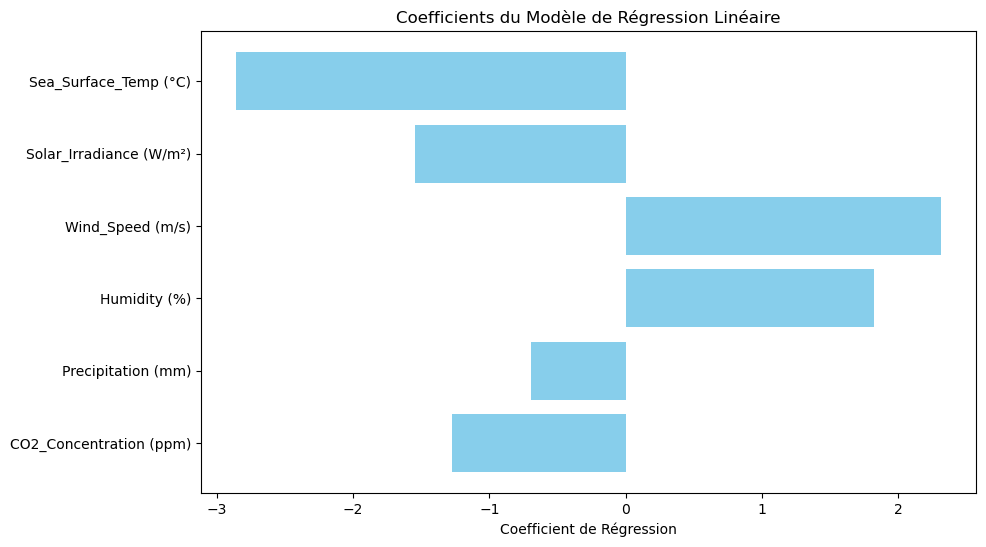

In [20]:
# Création du graphique des coefficients de régression
plt.figure(figsize=(10, 6))
plt.barh(features.columns, regression_coefficients, color='skyblue')
plt.xlabel('Coefficient de Régression')
plt.title('Coefficients du Modèle de Régression Linéaire')
plt.show()

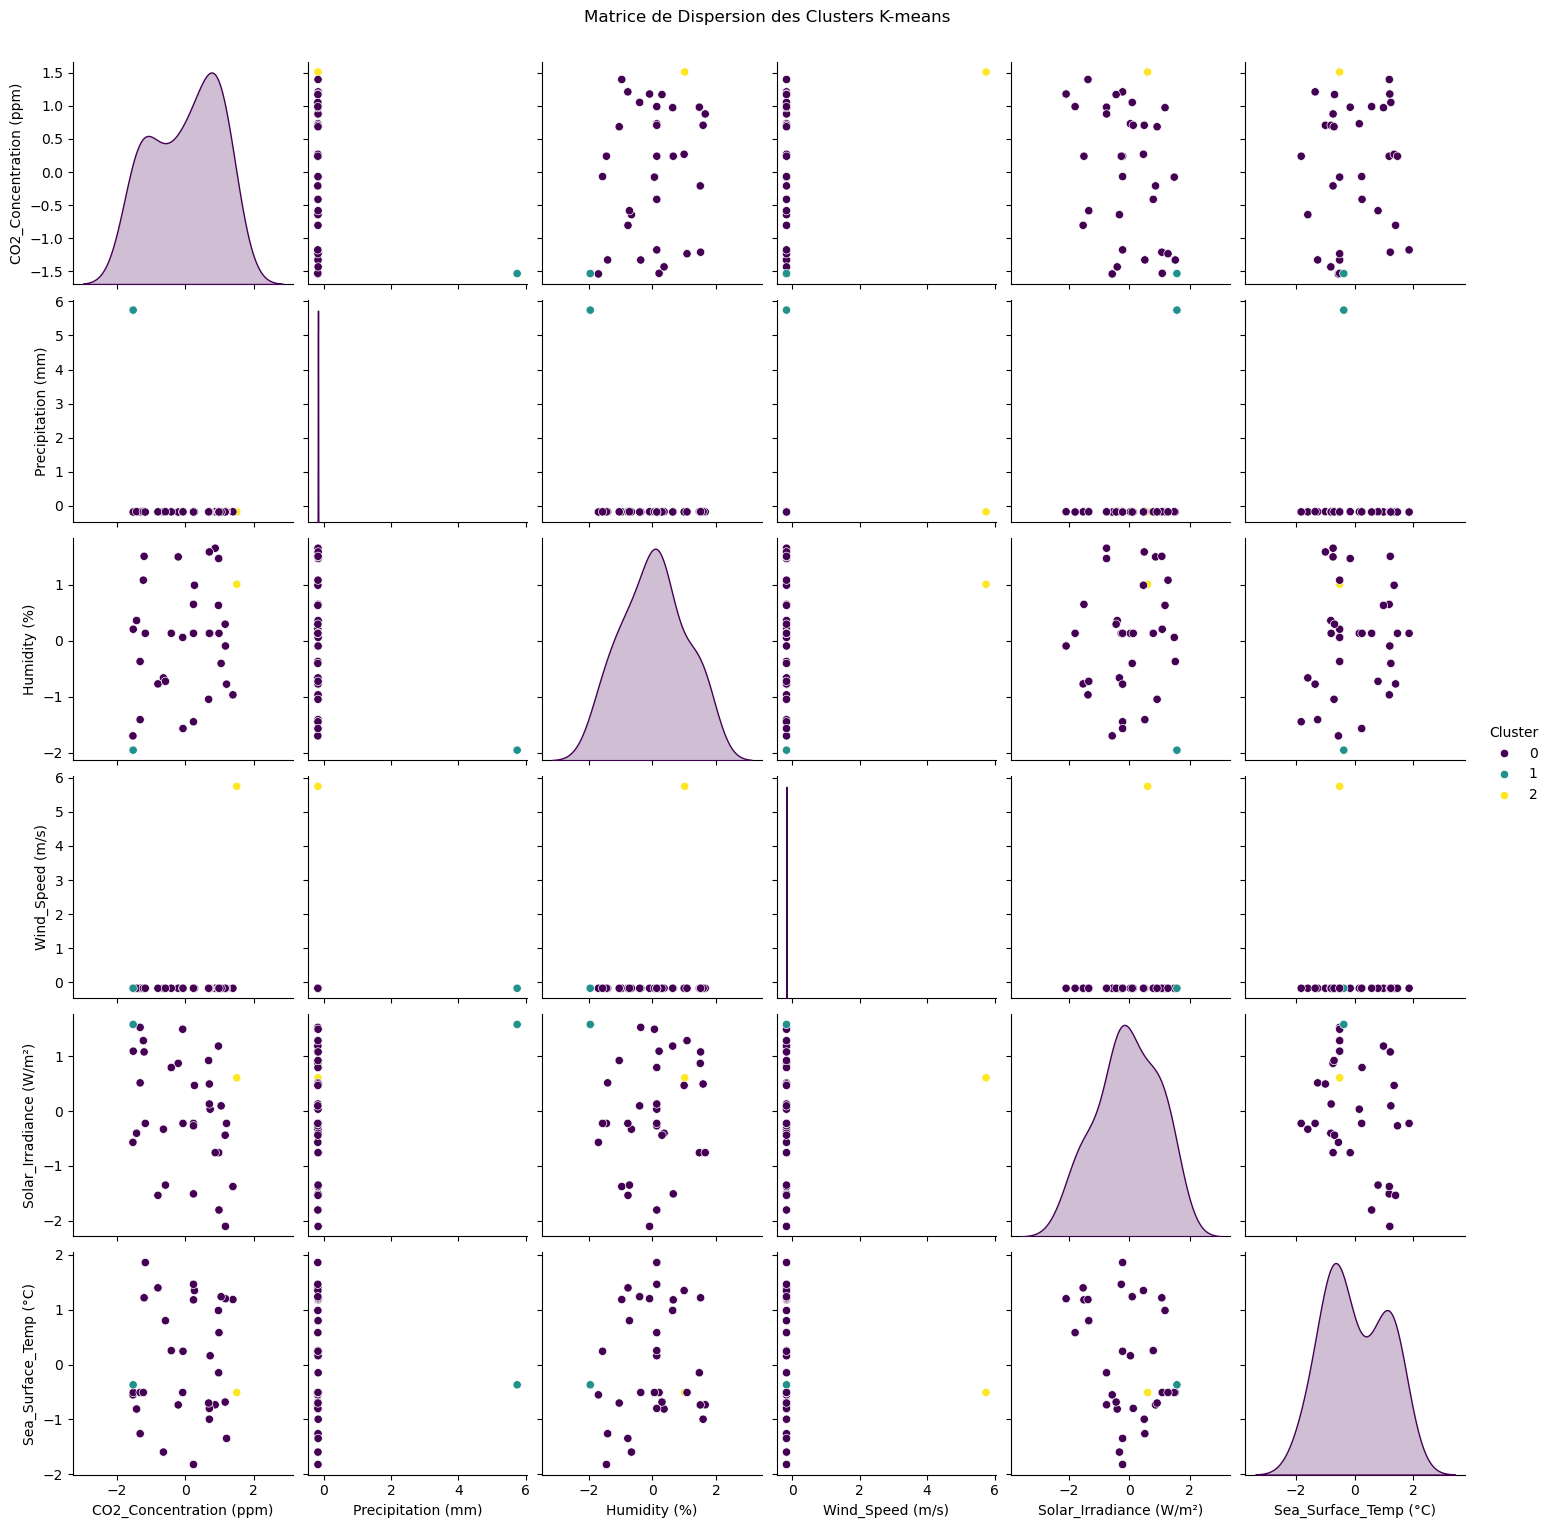

In [22]:
# Créer un DataFrame avec les caractéristiques et les labels des clusters
df_features = pd.DataFrame(X_train_scaled, columns=features.columns)
df_features['Cluster'] = clusters

# Créer une matrice de dispersion
sns.pairplot(df_features, hue='Cluster', palette='viridis')
plt.suptitle('Matrice de Dispersion des Clusters K-means', y=1.02)
plt.show()

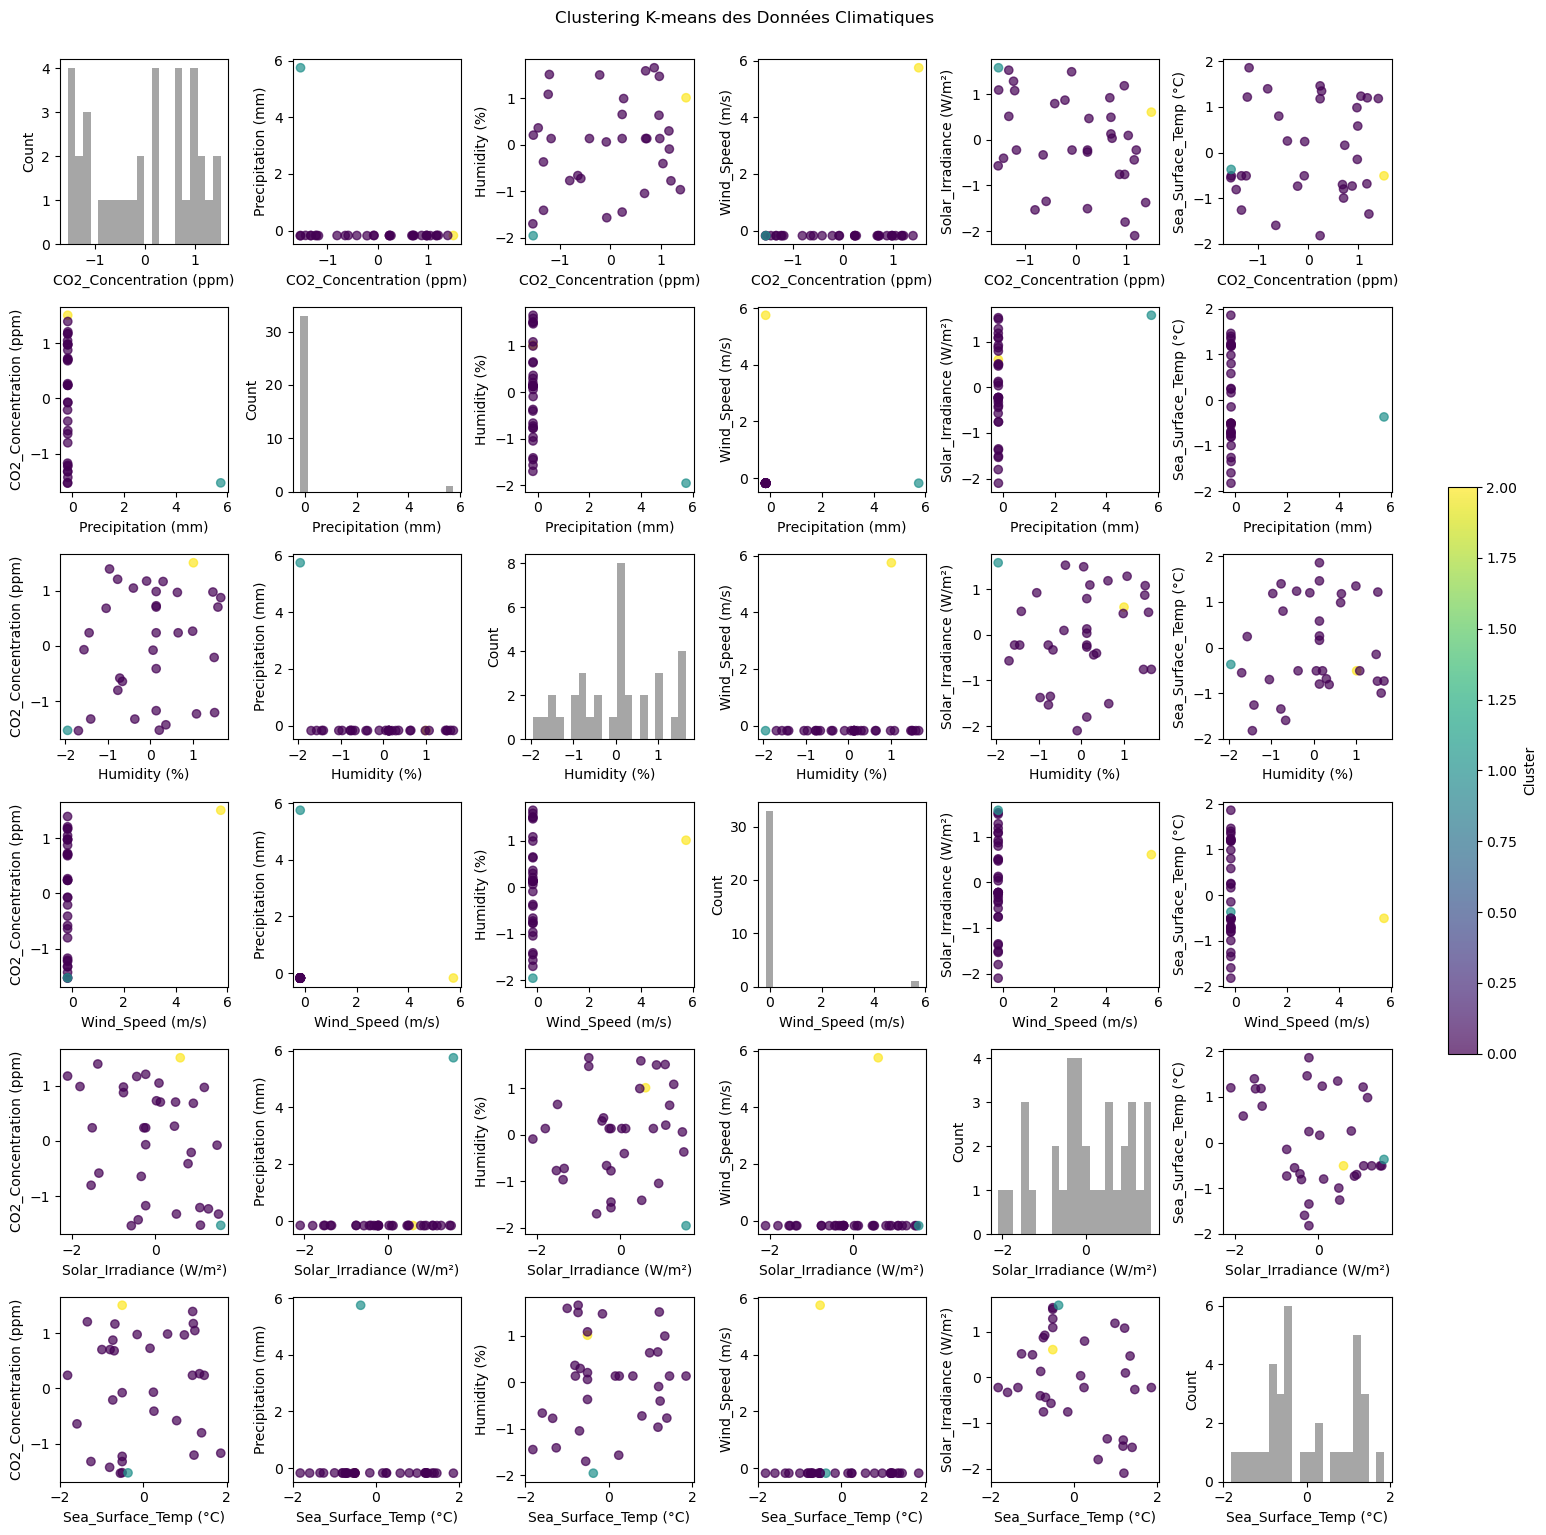

In [23]:
# Nombre de caractéristiques
num_features = len(features.columns)

# Création de sous-graphiques pour chaque paire de caractéristiques
fig, axes = plt.subplots(nrows=num_features, ncols=num_features, figsize=(15, 15))

# Création des sous-graphiques
for i in range(num_features):
    for j in range(num_features):
        ax = axes[i, j]
        if i != j:
            # Afficher les points de clustering pour les paires de caractéristiques
            sc = ax.scatter(X_train_scaled[:, i], X_train_scaled[:, j], c=clusters, cmap='viridis', alpha=0.7)
            ax.set_xlabel(features.columns[i])
            ax.set_ylabel(features.columns[j])
        else:
            # Afficher l'histogramme pour la diagonale
            ax.hist(X_train_scaled[:, i], bins=20, color='gray', alpha=0.7)
            ax.set_xlabel(features.columns[i])
            ax.set_ylabel('Count')
        
        # Ajuster la disposition des sous-graphiques
        plt.tight_layout()

# Ajouter une légende pour les clusters
fig.colorbar(sc, ax=axes, orientation='vertical', fraction=0.02, pad=0.04, label='Cluster')

plt.suptitle('Clustering K-means des Données Climatiques', y=1.02)
plt.show()